Kickstarter Data Analysis



In [1]:
!pip install -q transformers >> output1.txt
!pip install -r requirements.txt >> output2.txt
print("Done")

Done


In [2]:
import time
from datetime import datetime, timedelta

from bs4 import BeautifulSoup
from lxml import etree, html
import xml.etree.ElementTree as et
from xml.etree.ElementTree import Element
from typing import List

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
from tqdm.notebook import trange, tqdm 

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
])

from transformers import pipeline


[nltk_data] Downloading package names to /home/twford/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /home/twford/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /home/twford/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/twford/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/twford/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/twford/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/twford/nltk_data...
[nltk_data]   Packag

In [3]:
def rec_comment(comments:List[str]):
    name = None
    time_i = -1
    superbacker = False
    for i, comm in enumerate(comments):
        if comm.endswith('ago'):
            time_i = i
            break
    time = comments[time_i]
    if comments[time_i-1] == 'Superbacker':
        superbacker = True
    else:
        name = comments[time_i-1]
    comment_text = comments[time_i+1]

    print(name, superbacker, time, comment_text)
    
def user_scrape(data:List[str]):
    # print(data)
    user = None
    superbacker = False
    time = None
    text = None
    user = data[0]
    try:
        if "Creator" in data[1] or "Collaborator" in data[1]:
        # if "Superbacker" in data[1]:
            superbacker = True
        if data[2].endswith('ago'):
            time = data[2]
            try:
                text = data[3:]
            except:
                pass
        else:
            time = data[1]
            text = data[2:]
    except Exception as e:
        # print(e, data)
        # raise(e)
        pass
    # print('Successful Scrape:', user, " ", text)
    return user, superbacker, time, text
    

In [4]:
G = nx.Graph()
all_text = []
with open('digger_data.html') as opened_html:
    opened_html = opened_html.read()
    tree: html = html.fromstring(str(opened_html))
    comments: List[Element] = tree.xpath('//*[@id="react-project-comments"]/ul')
    for item in comments:
        item: Element = item
        comments: List[Element] = item.findall('li')
        for comm in comments:
            user, supe, time = None,None,None
            # if supe:
                # continue
            try:
                c = list(comm[0].itertext())
                if c:
                    user, supe, time, text = user_scrape(c)
                    comment_text = list(comm[0][1].itertext())
                    if user not in G:
                        G.add_node(user, superbacker=supe, w=1)
                    else:
                        G.nodes[r_user]['w'] +=1
                    if not supe:
                        all_text += text

            except Exception as e:
                # print('first', e, list(comm[0][1].itertext()))
                # raise(e)
                pass
            try:
                replies = list(comm[1][1].findall(comm.tag))
                if replies:
                    for rep in replies:
                        r_user, r_supe, r_time, r_text = user_scrape(list(rep.itertext()))
                        # if r_supe:
                            # continue
                        if not supe:
                            all_text += r_text
                        if r_user not in G:
                            G.add_node(r_user, superbacker=r_supe, w=1)
                        else:
                            G.nodes[r_user]['w'] +=1
                            # print(r_user)
                        G.add_edge(user, r_user)
            except Exception as e:
                # print('second', e, list(comm[0][1].itertext()))
                # raise(e)
                pass
            

In [5]:
    print(G.size(), G.order())
    print(nx.degree_centrality(G))
    print(nx.attribute_assortativity_coefficient(G, "superbacker"))
    print(nx.attribute_assortativity_coefficient(G, "w"))
    print(nx.degree_assortativity_coefficient(G))

43 110
{'merkelc': 0.0, 'Thomas Keyton': 0.0, 'Vidur Paliwal': 0.0, 'M': 0.0, 'Michael Bertrand': 0.0, 'Xagarath': 0.0, 'fighting_blindly': 0.05504587155963303, 'Katherine Reid': 0.0, 'Bo Dixen Pedersen': 0.0, 'Dejan Malenic': 0.0, 'This person has canceled their pledge.': 0.01834862385321101, 'David Penny': 0.0, 'Paul': 0.01834862385321101, 'Zac Chatham': 0.0, 'Tiffany': 0.0, 'Tom Surace': 0.0, 'Robert Holbach': 0.0, 'Grim Oak Press': 0.10091743119266056, 'Sal Vatore': 0.0, 'Mariam Zama': 0.0, 'John Merkle': 0.0, 'Andy Wintle': 0.0, "Jason 'XenoPhage' Frisvold": 0.0, 'Aaron Markworth': 0.0, 'Natalie': 0.0, 'Liam de Borst': 0.0, 'Sandra Alyssa': 0.0, 'Steve Cobb': 0.0, 'okravetz': 0.0, 'Sarah Iovan': 0.0, 'Steve Terry': 0.0, 'Lauren Kramer': 0.0, 'Stacia Schwartz': 0.03669724770642202, 'Jyuichi': 0.009174311926605505, 'Matthew Murphy': 0.0, 'Dennine': 0.0, 'Jonathan': 0.0, 'Karim': 0.03669724770642202, 'Catherine Parker': 0.009174311926605505, 'Kit Skyfire': 0.027522935779816515, 'msco

In [6]:
collabs = 0
for node, data in G.nodes(data=True):
    if data['superbacker']:
        print(node)
        collabs += 1

print(collabs)

Grim Oak Press
Aaron J. Amendola
2


In [7]:
sorted_keys = sorted(G.nodes(), key=lambda n: G.nodes[n]['w'], reverse=True)
top_n = [(k, G.nodes(data=True)[k]) for k in sorted_keys][:25]

In [8]:
super_count = 0
for name in top_n:
    # print(name)
    if name[1]['superbacker']:
        super_count +=1
print(super_count/len(top_n))

0.08


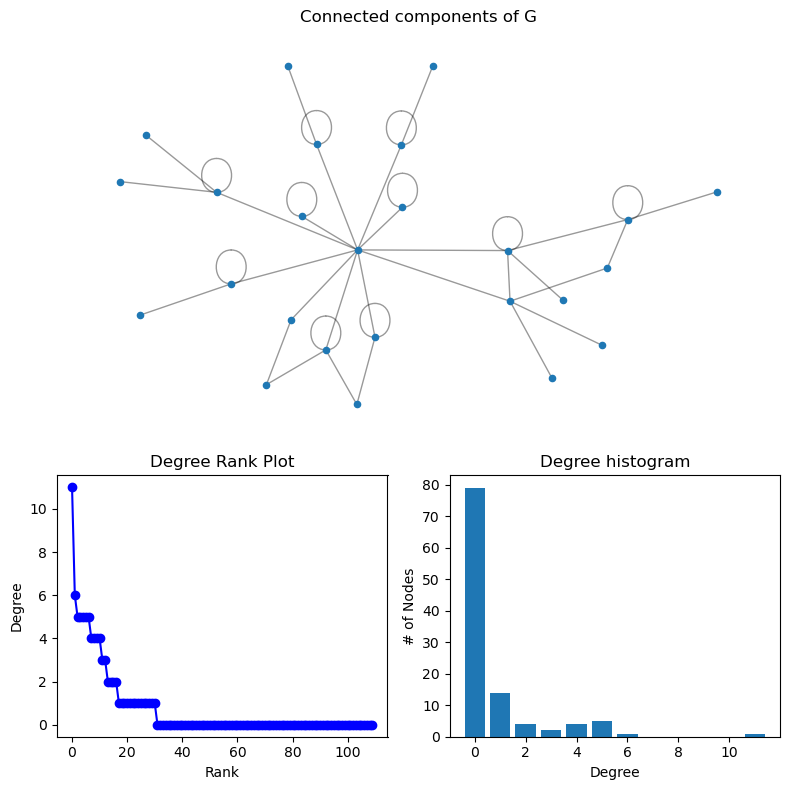

In [9]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

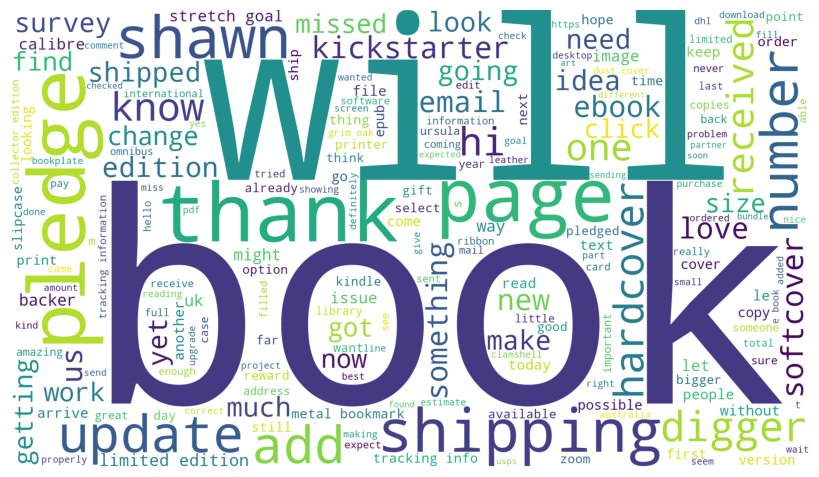

In [10]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in all_text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1680, height = 960,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 16), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [11]:
sentiment_pipeline = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment")

Device set to use cuda:0


In [12]:
score_list = sentiment_pipeline(all_text)

In [13]:
label0 = 0
label2 = 0
for item in score_list:
    if item['label'] == 'LABEL_0':
        label0 += 1
    elif item['label'] == 'LABEL_2':
        label2 += 1

In [14]:
print("negative sentiment: ", label0/len(score_list))
print("positive sentiment: ", label2/len(score_list))

negative sentiment:  0.11080332409972299
positive sentiment:  0.33518005540166207


In [15]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(''.join(all_text))

{'neg': 0.05, 'neu': 0.814, 'pos': 0.136, 'compound': 1.0}